###The Sparks Foundation - Data Science & Business Analytics Internship

Task-7:

Stock Market Prediction using Numerical and Textual Analysis

● Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
new_col_names = ['Date', 'Category', 'News']
news_df= pd.read_csv('/content/india-news-headlines.csv', names=new_col_names)
news_df.head()

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [6]:
news_df.drop(0, inplace=True)
news_df.drop('Category', axis=1, inplace=True)
news_df.head()

,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic


In [7]:
import pandas_datareader as pdr

In [8]:
import yfinance as yf

stock_data = yf.download('AMZN', start='2018-01-1', end='2023-11-17')
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


In [9]:
stock_data.to_csv('amzn.csv')

In [10]:
df=pd.read_csv('amzn.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
4,2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


In [11]:
df.shape

(1480, 7)

In [12]:
df_1 = df.reset_index()['Close']
df_1.head()

0    59.450500
1    60.209999
2    60.479500
3    61.457001
4    62.343498
Name: Close, dtype: float64

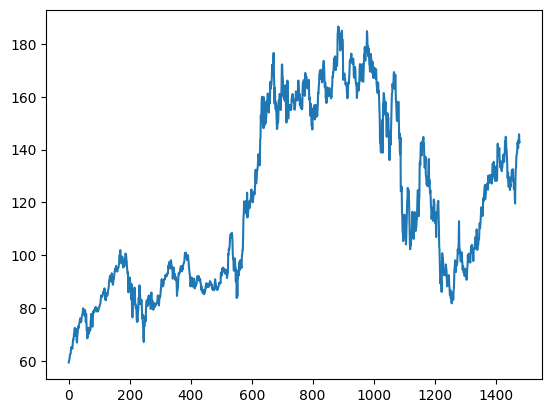

In [13]:
plt.plot(df_1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_1 = scaler.fit_transform(np.array(df_1).reshape(-1,1))
df_1

array([[0.        ],
       [0.00597466],
       [0.00809471],
       ...,
       [0.67927553],
       [0.65882237],
       [0.65591177]])

In [15]:
train_size=int(len(df_1)*0.65)
test_size=len(df_1)-train_size
train_data, test_data=df_1[0:train_size,:],df_1[train_size:len(df_1),:1]

In [16]:
def create_dataset(dataset, time_step=1):
    datax, datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset [i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset [i+time_step, 0])
    return np.array(datax), np.array(datay)

In [17]:
time_step=100
X_train,y_train=create_dataset(train_data, time_step)
X_test,y_test=create_dataset(test_data, time_step)

In [18]:
X_train

array([[0.        , 0.00597466, 0.00809471, ..., 0.15433842, 0.16238596,
        0.16286189],
       [0.00597466, 0.00809471, 0.0157843 , ..., 0.16238596, 0.16286189,
        0.16564663],
       [0.00809471, 0.0157843 , 0.02275801, ..., 0.16286189, 0.16564663,
        0.1667165 ],
       ...,
       [0.79831654, 0.8043502 , 0.7858716 , ..., 0.88803107, 0.88701234,
        0.8755704 ],
       [0.8043502 , 0.7858716 , 0.79342753, ..., 0.88701234, 0.8755704 ,
        0.8834173 ],
       [0.7858716 , 0.79342753, 0.79019824, ..., 0.8755704 , 0.8834173 ,
        0.84429673]])

In [19]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((861, 100, 1), (417, 100, 1), (861,), (417,))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data =(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
14/14 [==============================] - 10s 262ms/step - loss: 0.1071 - val_loss: 0.0093
Epoch 2/100
14/14 [==============================] - 2s 173ms/step - loss: 0.0161 - val_loss: 0.0211
Epoch 3/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0059 - val_loss: 0.0078
Epoch 4/100
14/14 [==============================] - 3s 236ms/step - loss: 0.0031 - val_loss: 0.0064
Epoch 5/100
14/14 [==============================] - 3s 231ms/step - loss: 0.0026 - val_loss: 0.0062
Epoch 6/100
14/14 [==============================] - 2s 172ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 7/100
14/14 [==============================] - 2s 173ms/step - loss: 0.0023 - val_loss: 0.0061
Epoch 8/100
14/14 [==============================] - 2s 172ms/step - loss: 0.0023 - val_loss: 0.0068
Epoch 9/100
14/14 [==============================] - 3s 202ms/step - loss: 0.0022 - val_loss: 0.0067
Epoch 10/100
14/14 [==============================] - 4s 266ms/step - loss: 0.0022 - val_l

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

14/14 [==============================] - 0s 32ms/step


In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

126.0514876054542

In [27]:
math.sqrt(mean_squared_error(y_test, test_predict))

121.71310160445589

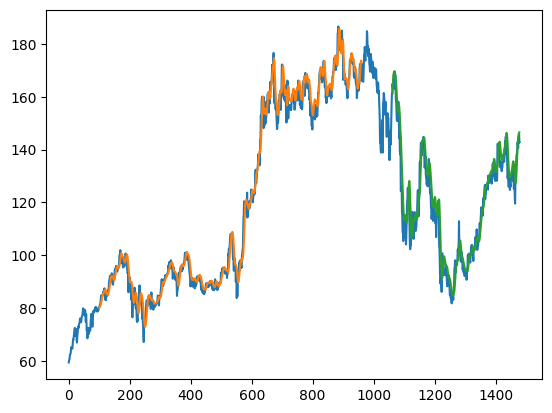

In [28]:
look_back=100

trainpredictplot=np.empty_like(df_1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :]=train_predict

#shif test predict for plot
testpredictplot=np.empty_like(df_1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df_1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

len(df_1)

1480

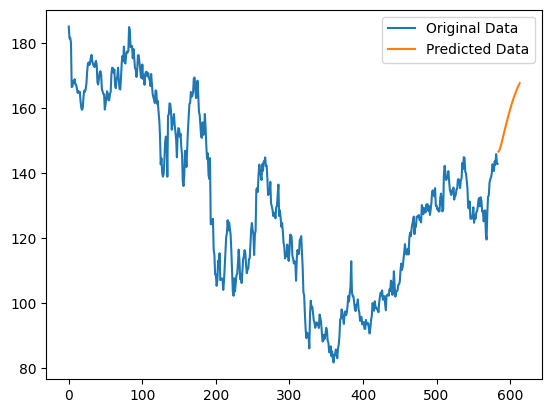

In [31]:
x_input=test_data[248:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array
lst_output=[]
n_steps=100
i=0

while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, -1, 1))
        yhat=model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, -1,1))
        yhat=model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


original_data = scaler.inverse_transform(df_1[896:])
day_pred = range(len(original_data), len(original_data) + len(lst_output))

plt.plot(original_data, label='Original Data')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Data')
plt.legend()
plt.show()


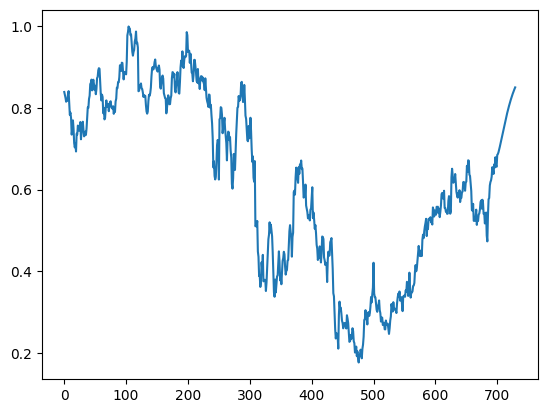

In [32]:
df3=df_1.tolist()
df3.extend(lst_output)
plt.plot(df3[780:])

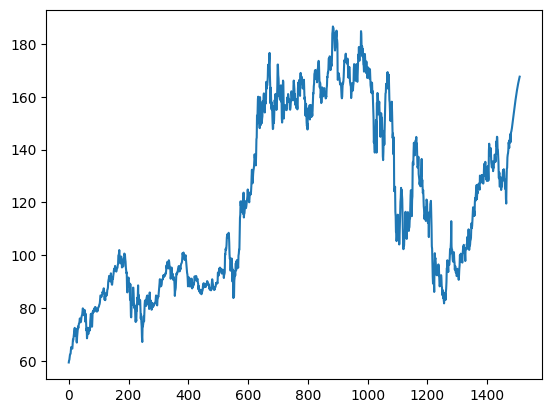

In [33]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)